# Este programa pretende agrupar a los usuarios de Tweeter de acuerdo a su personalidad por medio de la libreria K-means


Primero cargaremos las librerias a utilizar 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
dataframe = pd.read_csv(r"analisis.csv")
dataframe.head()


,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [3]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

1-Actor/actriz

2-Cantante

3-Modelo

4-Tv,series

5-Radio

6-Tecnología

7-Deportes

8-Politica

9-Escritor

 Para saber cuantos datos cuenta cada columna usaremos la siguiente linea 

In [4]:
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


# Visualizacion de datos 

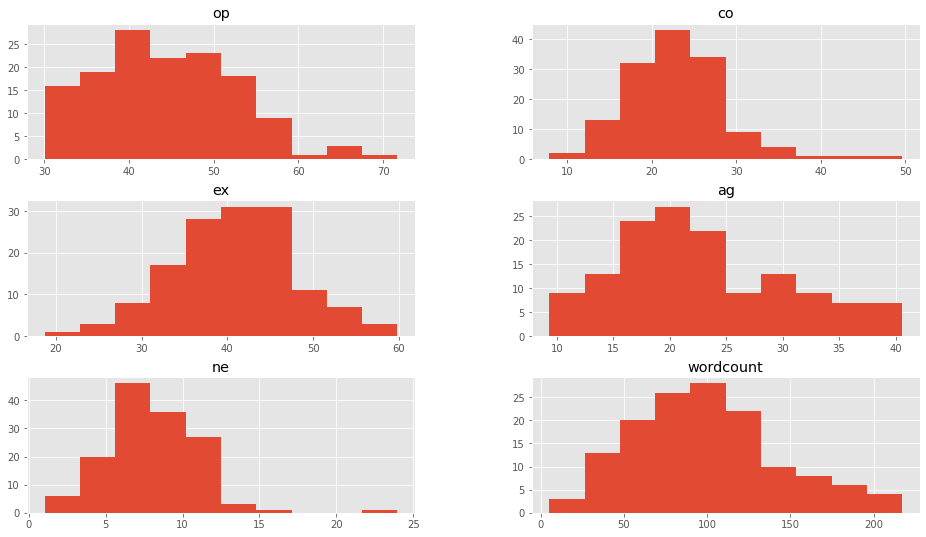

In [5]:
dataframe.drop(['categoria'],1).hist()
plt.show()

utilizaremos 3 dimensiones de las mostradas 

D:\Users\benle\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


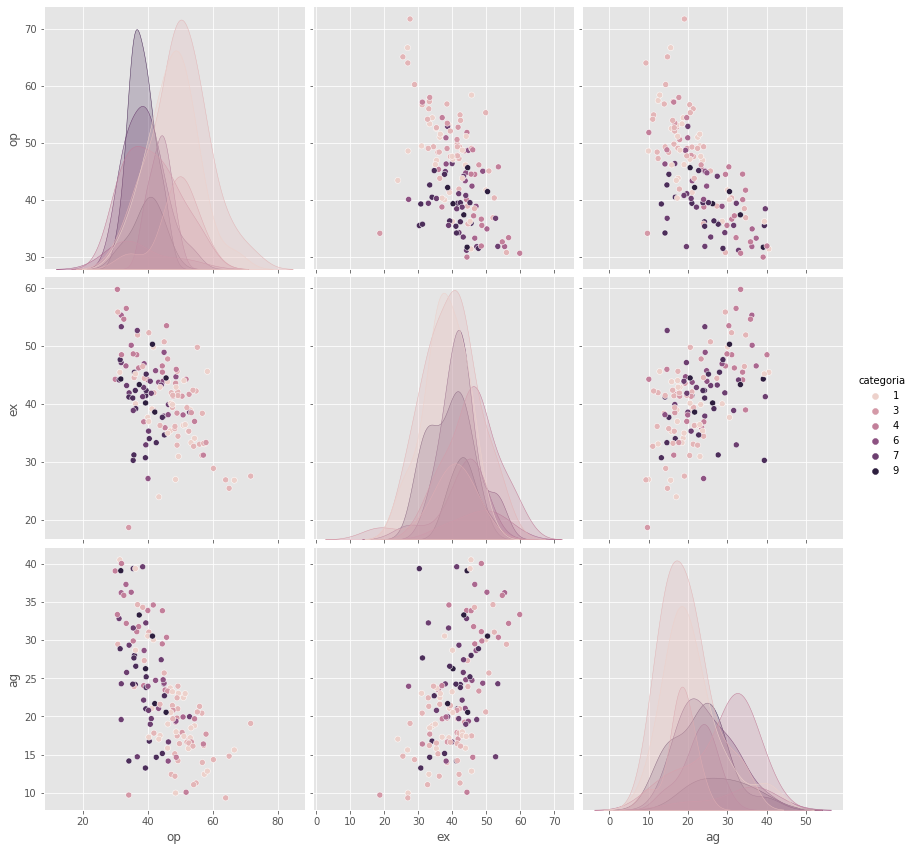

In [6]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

In [7]:
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

Para tener una mejor imagen crearemos una figura 3d

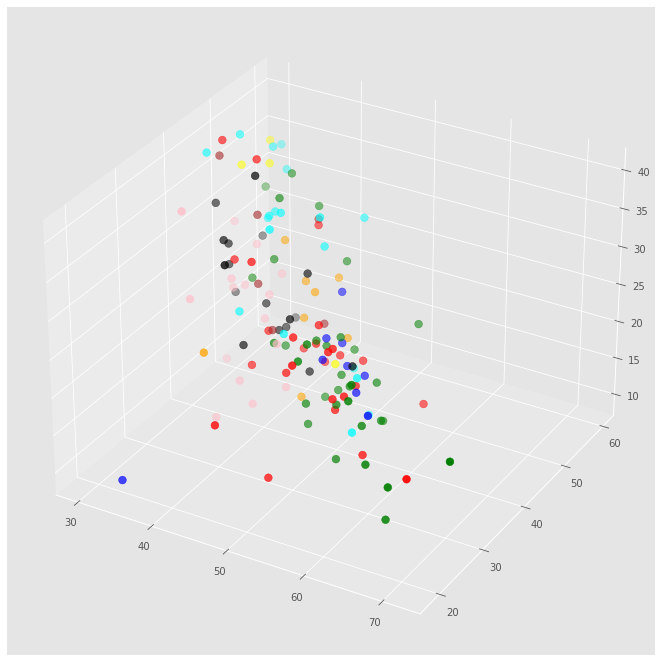

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

Ahora trataremos de recrear dicha imagen pero con "clusters" diferenciados, esto con la ayuda de K-means

Primero buscaremos el valor de K

D:\Users\benle\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


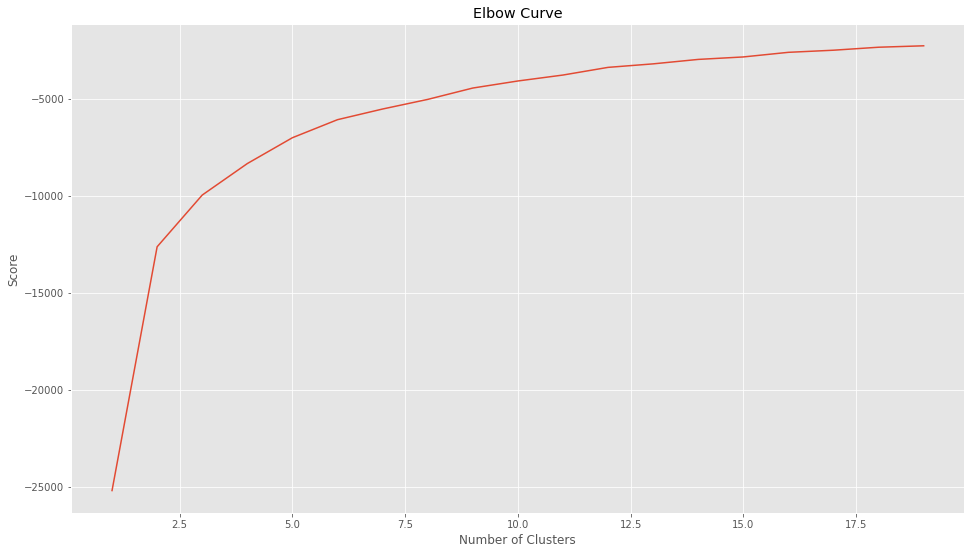

In [9]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

como podemos observar se trara de una curva suave por lo que podriamos usar el valor de 5 

In [10]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[42.30345378 33.11591904 22.32422848]
 [50.42588653 40.66723528 17.30892463]
 [58.70462307 30.53566167 15.72207033]
 [40.08005141 43.91735597 22.91023566]
 [35.91324212 48.09170045 33.41066009]]


Ahora veremos como cambio la grafica 3d con respecto a la primera

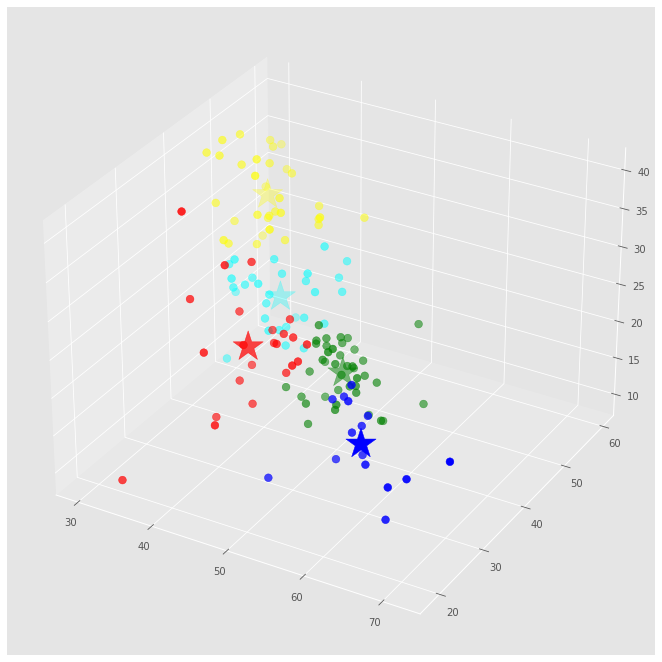

In [11]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

Con fin de poder desglozar lo obtenido se haran 3 graficas en 2d 

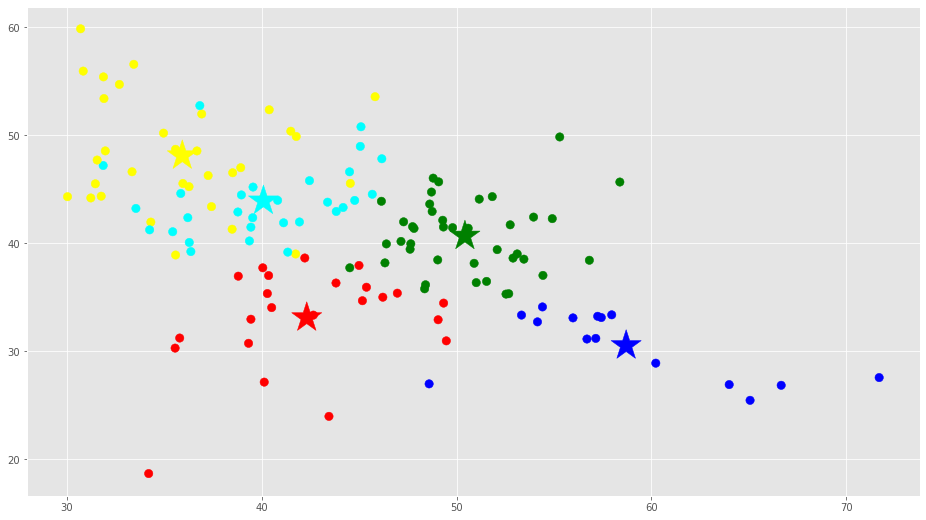

In [12]:

f1 = dataframe['op'].values
f2 = dataframe['ex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

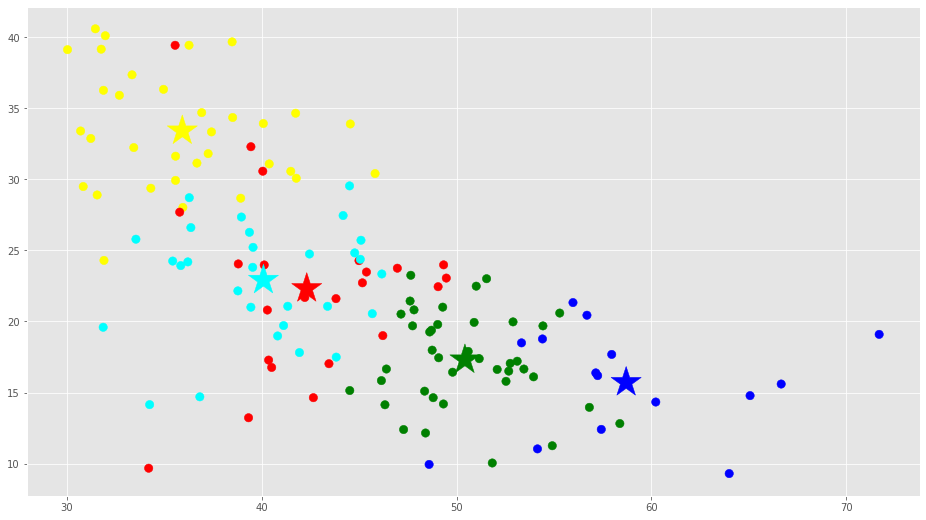

In [13]:
f1 = dataframe['op'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

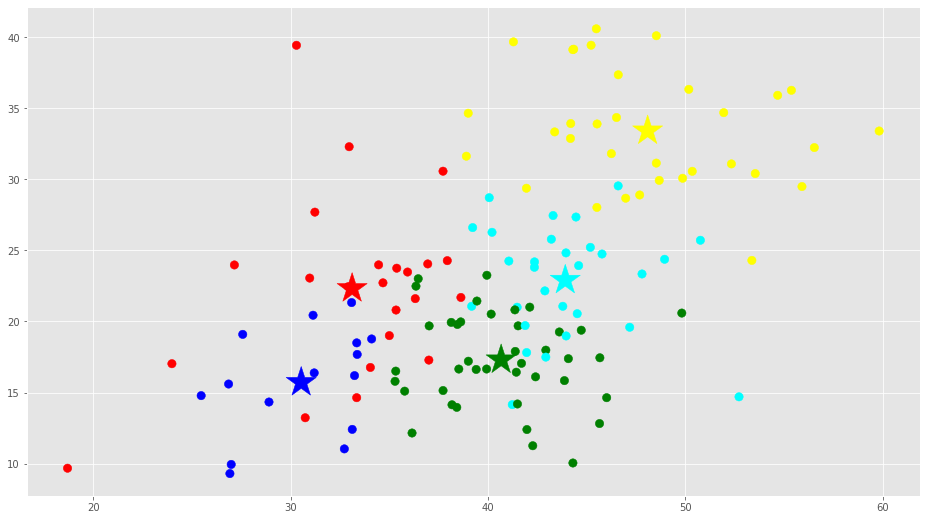

In [14]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

Como podemos observar en las graficas los grupos se cuentran bien definidos, ahora veremos cuantos usuarios contiene cada cluster

In [15]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,23
1,green,40
2,blue,15
3,cyan,29
4,yellow,33


In [16]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,6.0
2,2,3.0
3,3,1.0
4,4,2.0
5,5,NaN
6,6,1.0
7,7,3.0
8,8,6.0
9,9,1.0


In [17]:
for index, row in group_referrals.iterrows():
    if row["categoria"] == 2:
        print (row["usuario"], row["categoria"],row["label"])

justinbieber 2 0
ladygaga 2 0
thelittleidiot 2 0


In [18]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([120,  21,  82,  95,   4], dtype=int64)

In [19]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

SarahPalinUSA
carmenelectra
JudgeJudy
lorenzo99
alfredocasero1


In [20]:
for index, row in copy.iterrows():
    if row["label"] == 0:
        print (row["usuario"], row["categoria"],row["label"])

aguerosergiokun 7 0
andy_murray 7 0
Carrie_Br4dshaw 3 0
cesarmillan 4 0
Diane_Keaton 1 0
EdwardNorton 1 0
GeorgeHWBush 8 0
GwynethPaltrow 1 0
HerreraBeutler 8 0
HillaryClinton 8 0
hughlaurie 4 0
jiminhofe 8 0
jk_rowling 9 0
justinbieber 2 0
kobebryant 7 0
ladygaga 2 0
Rep_Hunter 8 0
SarahPalinUSA 8 0
SJP 1 0
SSantiagosegura 1 0
stevewoz 6 0
thelittleidiot 2 0
tomhanks 1 0


In [21]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta personality traits
new_labels = kmeans.predict(X_new)
print(new_labels)

[3]
